# <font color='red'>-----------------------------------------------------------------------------------------------------</font>
# <font color='green'>Capstone Project 1 - Life expectancy prediction</font>
## <font color='green'>The data is related to countrywise Human development index (HDI)</font>
# <font color='red'>-----------------------------------------------------------------------------------------------------</font>

## <ins><div class="alert alert-block alert-info">*Objective: -*</div></ins>

### The objective is to build a model to predict the life expectancy of a country for a given year.

### <ins><div class="alert alert-block alert-warning">*Step 1: Importing all the libraries*</div></ins>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from numpy import percentile

### <ins><div class="alert alert-block alert-warning">*Step 2: Loading the dataset and reading the file*</div></ins>

In [2]:
# Loading the dataset

life_df = pd.read_csv("Life expectancy data.csv")
life_df.columns = life_df.columns.str.strip()
life_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
print(life_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

There are 2938 rows and 22 columns in the dataset. The dataset has null values in a lot of columns which will have to be treated

In [4]:
life_df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

From above it is observed that Columns 'Hepatitis B', 'GDP', 'Population' is the top three columns with most missing values. Also since most of the columns are numerical column we might use imputation like mean to treat the missing values 

### <ins><div class="alert alert-block alert-warning">*Step 3: Cleaning data and Performing Exploratory Data Analysis*</div></ins>

The 'Year' column is actually an object type column and not numeric as it can be used for categorisation. Hence converting column 'Year' into an object

Also do the same with Life expectancy since it is actually str datatype although in info it is showing as float

- **Changing data type of 'Year' and 'Life expectancy' column**

In [5]:
life_df['Year'] = life_df['Year'].astype('object')
life_df['Life expectancy'] = life_df['Life expectancy'].astype('float64')
life_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   object 
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

Now we can see that the column 'Year' is an object

In [6]:
# Lets check if there is any category where value is repeated

life_df['Status'].value_counts()

Developing    2426
Developed      512
Name: Status, dtype: int64

In [7]:
life_df['Country'].value_counts()

Armenia                  16
Portugal                 16
Uzbekistan               16
Ukraine                  16
Kazakhstan               16
                         ..
Monaco                    1
Palau                     1
Saint Kitts and Nevis     1
Niue                      1
Marshall Islands          1
Name: Country, Length: 193, dtype: int64

From above it is clear that there are 193 unique values which means 193 unique countries and hence no country is repeated and hence no name corrections are required for the country names <br> Also For 'Status' there are only two values developed and developing which means there are no repeated or error in category values

We also see there is a column that is incorrectly named as thinness  1-19 years whereas it should be 10-19 years since we already have 5-9 years category

In [8]:
life_df.rename(columns={'thinness  1-19 years':'thinness  10-19 years'},inplace=True)
life_df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


The column name is now successfully changed

- **Now we will check for outliers and treat them if required**

In [9]:
# Checking statistical information of data

life_df.describe()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


From above information we can see that there are definitely outliers in the data. Some columns have 50th percentile more than mean and some columns have mean values more than 50th percentile. This could be because of outliers which is affecting the average.

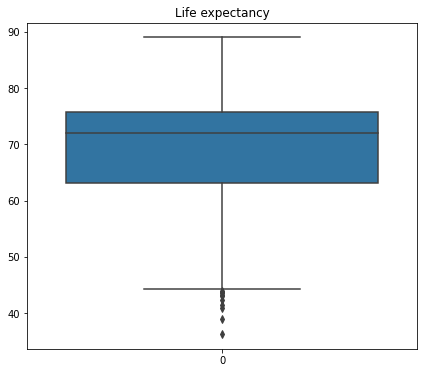

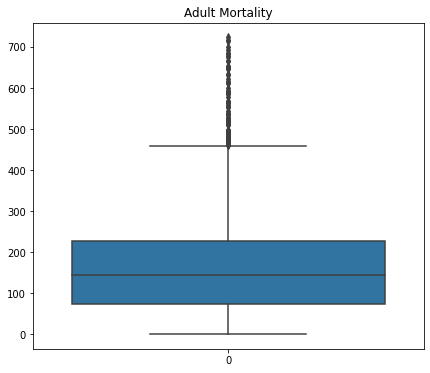

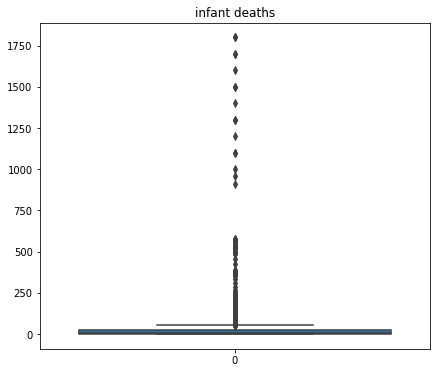

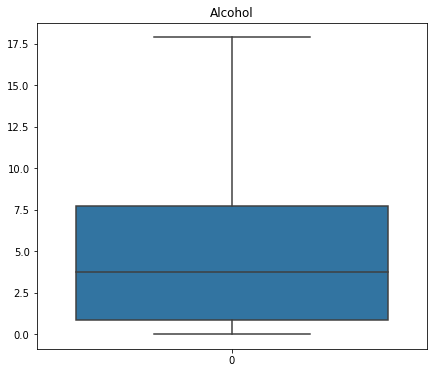

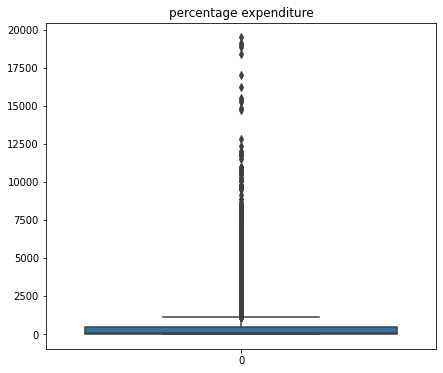

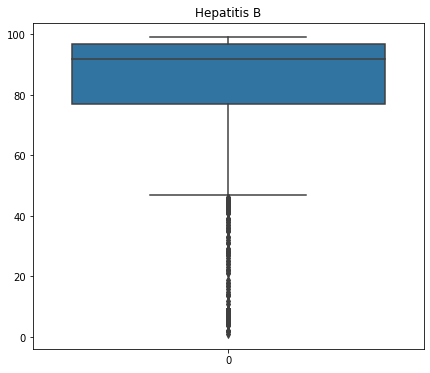

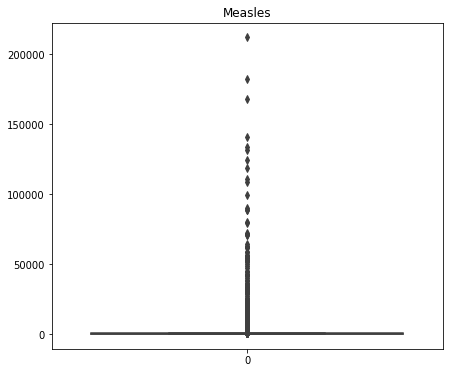

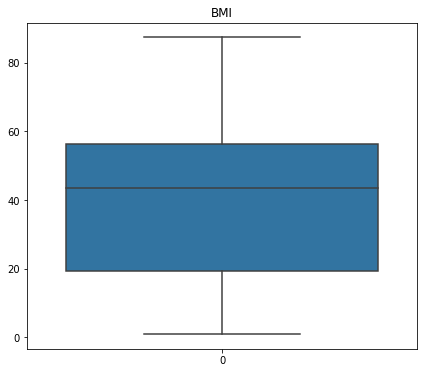

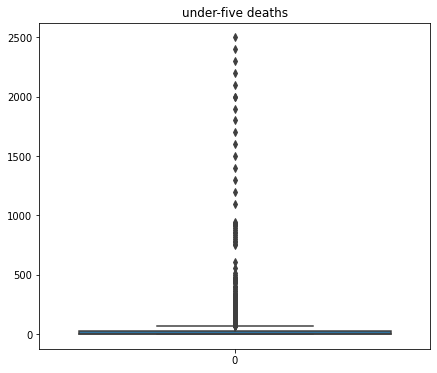

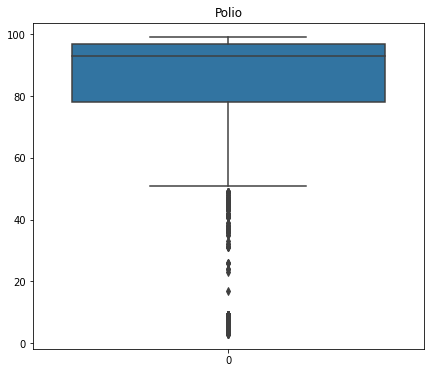

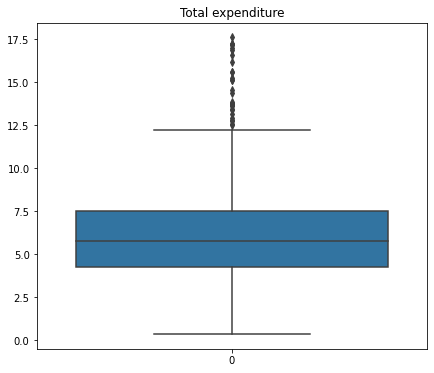

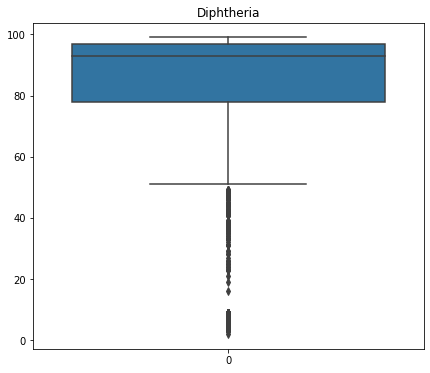

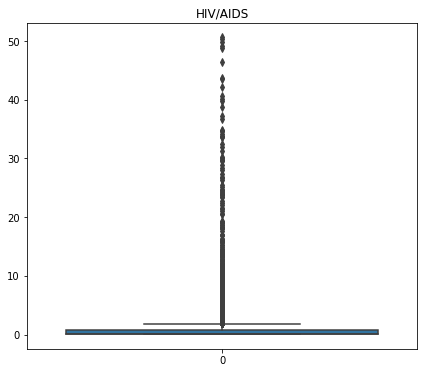

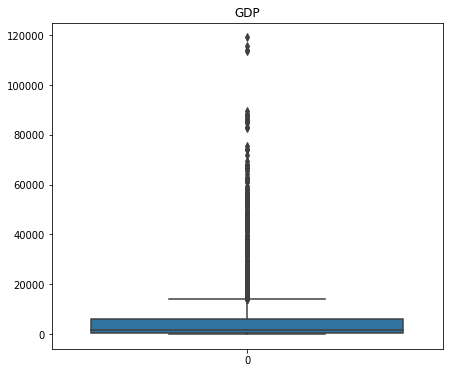

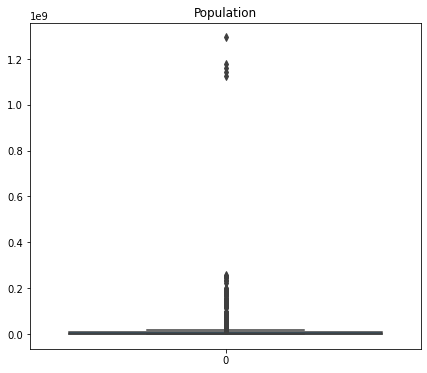

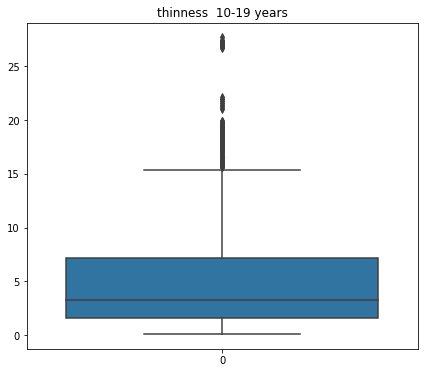

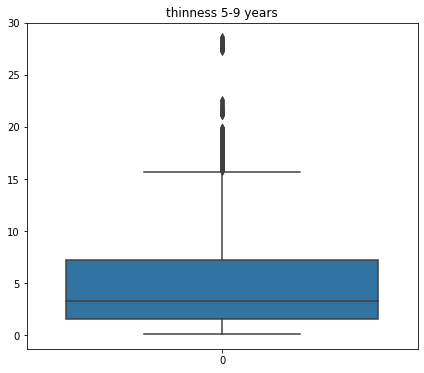

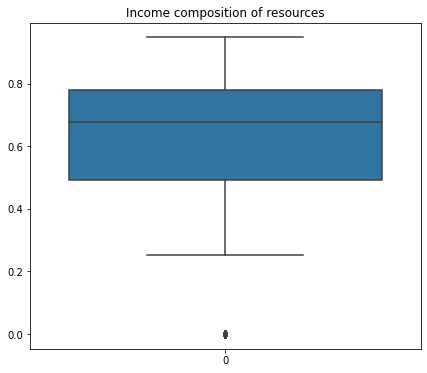

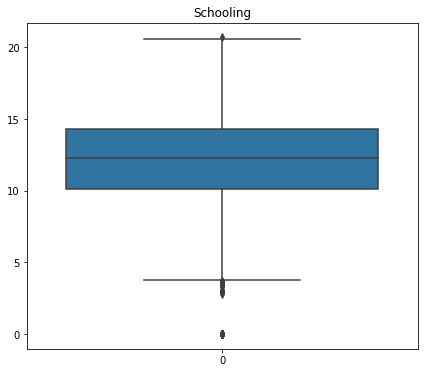

In [10]:
# Visualising outliers for numerical data

num_values = life_df.select_dtypes(exclude='object')
num_list = num_values.columns.values.tolist()

for i in num_list:
    plt.figure(figsize=(7,6))
    sns.boxplot(data=life_df[i])
    plt.title(i)
    plt.show()

From above boxplots and also the statistical summary it is observed that some variables have a very unnatural information. For eg:Infant deaths has min = 0, GDP has min=1.6 which seems odd or impossible. This indicates that null values is affecting the data in the variable. Lets plot those columns seperately

- **We will first treat the null values, possible treat outliers and then seperately plot boxplots for columns**

In [11]:
life_df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  10-19 years               34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [12]:
# filling in the null values using mean as per groupby 'status'

life_df[['Life expectancy', 'Adult Mortality','Alcohol',
         'Hepatitis B','BMI','Polio','Total expenditure',
         'Diphtheria','GDP','Population','thinness  10-19 years',
         'thinness 5-9 years','Income composition of resources',
        'Schooling']] = life_df.groupby(['Status'])['Life expectancy', 'Adult Mortality','Alcohol',
         'Hepatitis B','BMI','Polio','Total expenditure',
         'Diphtheria','GDP','Population','thinness  10-19 years',
         'thinness 5-9 years','Income composition of resources',
        'Schooling'].transform(lambda x: x.fillna(x.mean()))

In [13]:
life_df1 = life_df.copy()

In [14]:
life_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   object 
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2938 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [15]:
life_df1.describe()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,69.217738,164.857839,30.303948,4.589436,738.251295,81.206412,2419.592240,38.287849,42.035739,82.534801,5.932843,82.308742,1.742103,7382.749777,1.280920e+07,4.848421,4.879169,0.629394,12.025459
std,9.508437,124.084750,117.926501,3.958286,1987.914858,22.654897,11467.272489,19.930067,160.445548,23.352922,2.407843,23.640838,5.077785,13361.417098,5.382914e+07,4.395274,4.483454,0.207021,3.304714
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.200000,74.000000,0.000000,1.092500,4.685343,79.763930,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,72.000000,144.000000,3.000000,3.484119,64.912906,88.041298,17.000000,43.000000,4.000000,93.000000,5.600000,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.672000,12.300000
75%,75.600000,227.000000,22.000000,7.570000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.430000,97.000000,0.800000,5433.356450,1.407108e+07,7.100000,7.200000,0.780000,14.300000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


Thus we have successfully filled the missing values with the mean of each columns grouped by the columns 'Status'

- **Now we will treat the outliers wherever possible**
    - We will check what kind of distribution the data is following by plotting distplot and then deciding the type of outlier treatment

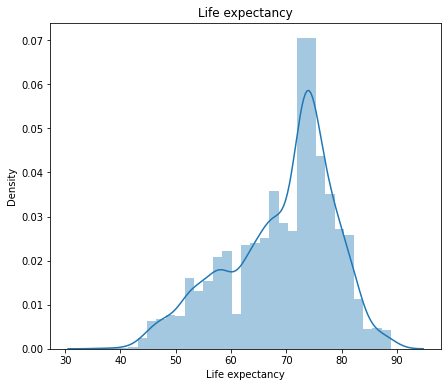

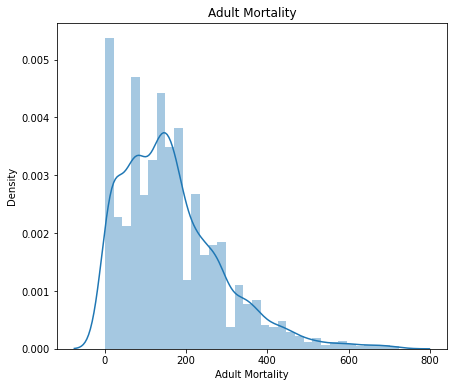

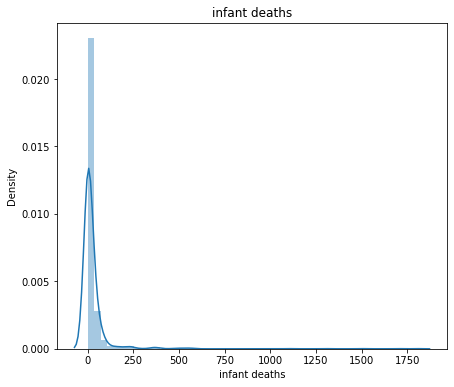

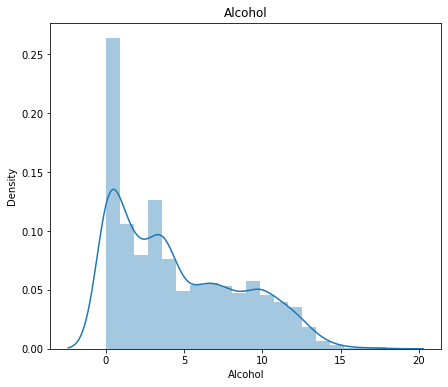

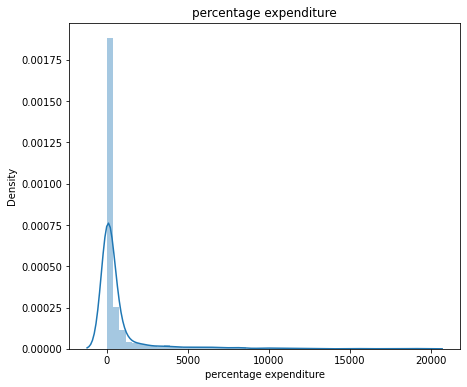

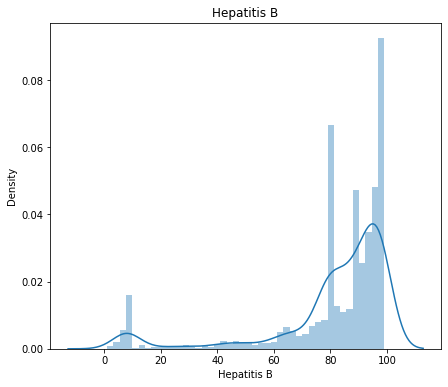

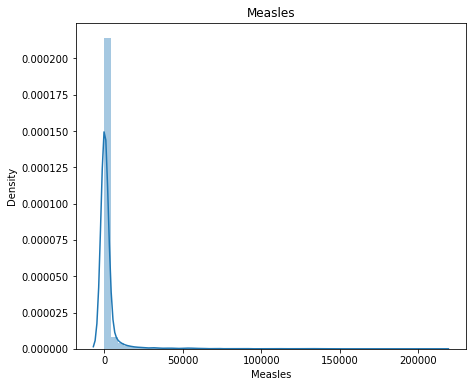

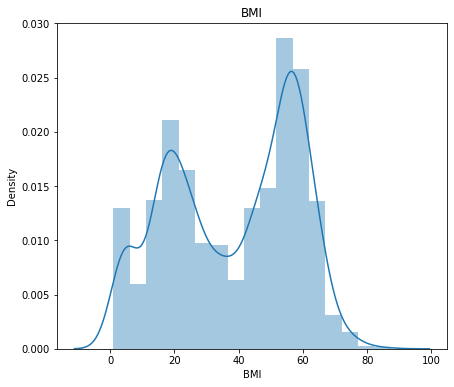

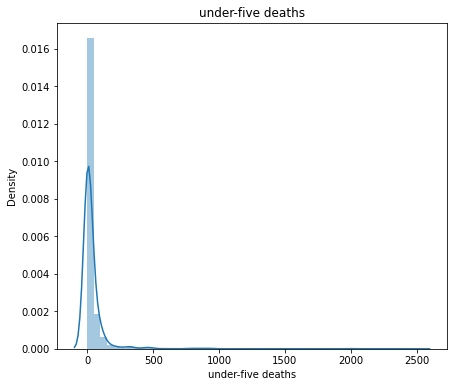

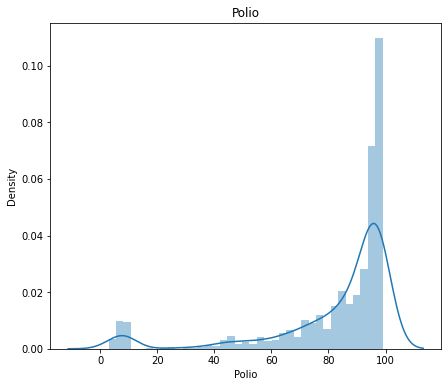

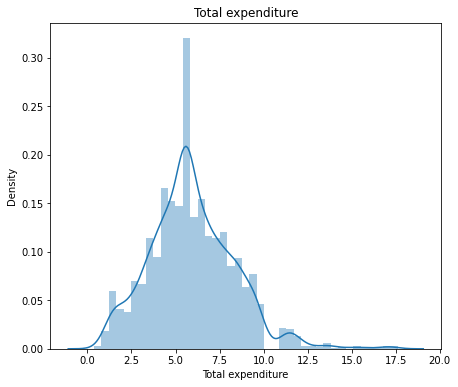

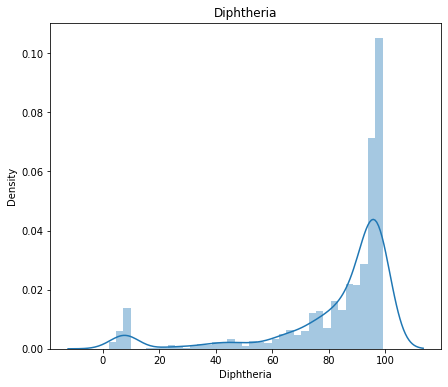

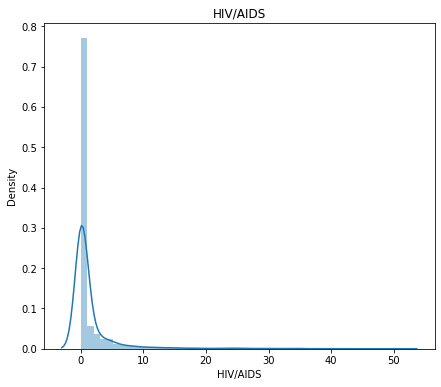

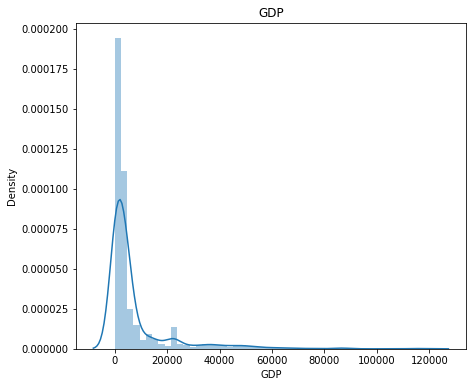

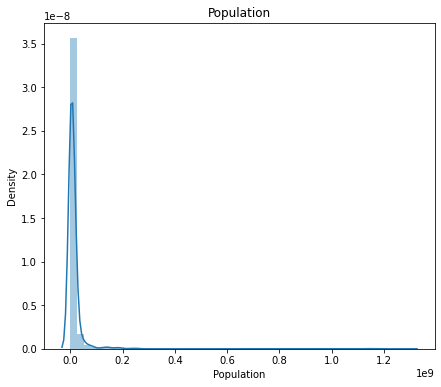

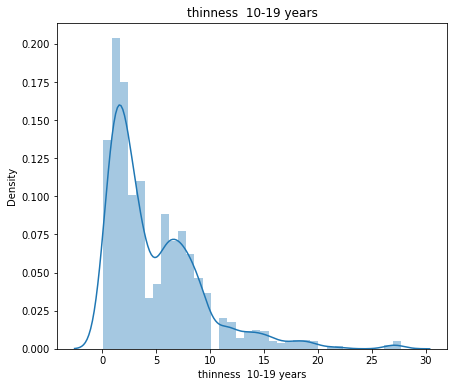

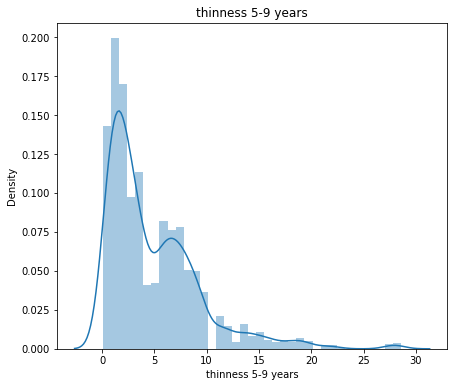

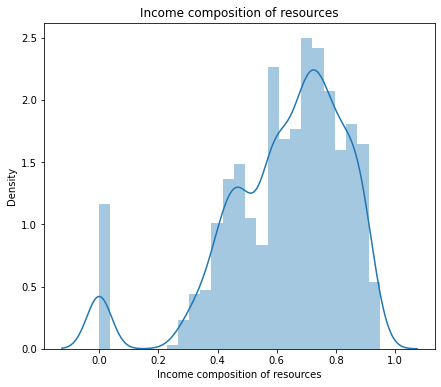

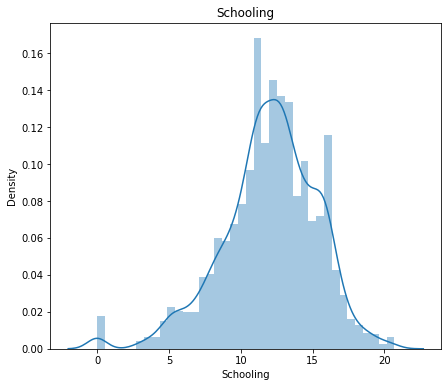

In [16]:
# checking normal distribution of the dataset by using distplot

num_values = life_df1.select_dtypes(exclude='object')
num_list = num_values.columns.values.tolist()

for i in num_list:
    plt.figure(figsize=(7,6))
    sns.distplot(life_df1[i])
    plt.title(i)
    plt.show()

From the above dataset it is observed that the data
is not following a normal distribution. We will do our outlier treatment based on interquartile IQR calculation only on those variables where data seems improbable or odd. 

In [17]:
# Mean BMI of 12 is considered lower limit of 12 of survival. Hence BMI less than 12 is considered is odd.
#Replacing all values below 12 with 12 

life_df1.loc[life_df1['BMI'] < 12, 'BMI'] = 12 

In [18]:
life_df1.describe()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 10-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,69.217738,164.857839,30.303948,4.589436,738.251295,81.206412,2419.592240,38.991015,42.035739,82.534801,5.932843,82.308742,1.742103,7382.749777,1.280920e+07,4.848421,4.879169,0.629394,12.025459
std,9.508437,124.084750,117.926501,3.958286,1987.914858,22.654897,11467.272489,18.823444,160.445548,23.352922,2.407843,23.640838,5.077785,13361.417098,5.382914e+07,4.395274,4.483454,0.207021,3.304714
min,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,12.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,63.200000,74.000000,0.000000,1.092500,4.685343,79.763930,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,72.000000,144.000000,3.000000,3.484119,64.912906,88.041298,17.000000,43.000000,4.000000,93.000000,5.600000,93.000000,0.100000,3116.561755,3.675929e+06,3.400000,3.400000,0.672000,12.300000
75%,75.600000,227.000000,22.000000,7.570000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.430000,97.000000,0.800000,5433.356450,1.407108e+07,7.100000,7.200000,0.780000,14.300000
max,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


**We have now been able to clean data and prepare data for model building**

### <ins><div class="alert alert-block alert-warning">*Step 4: Creating dummy variables for model building*</div></ins>

- Getting correlation matrix to understand the correlation among variables

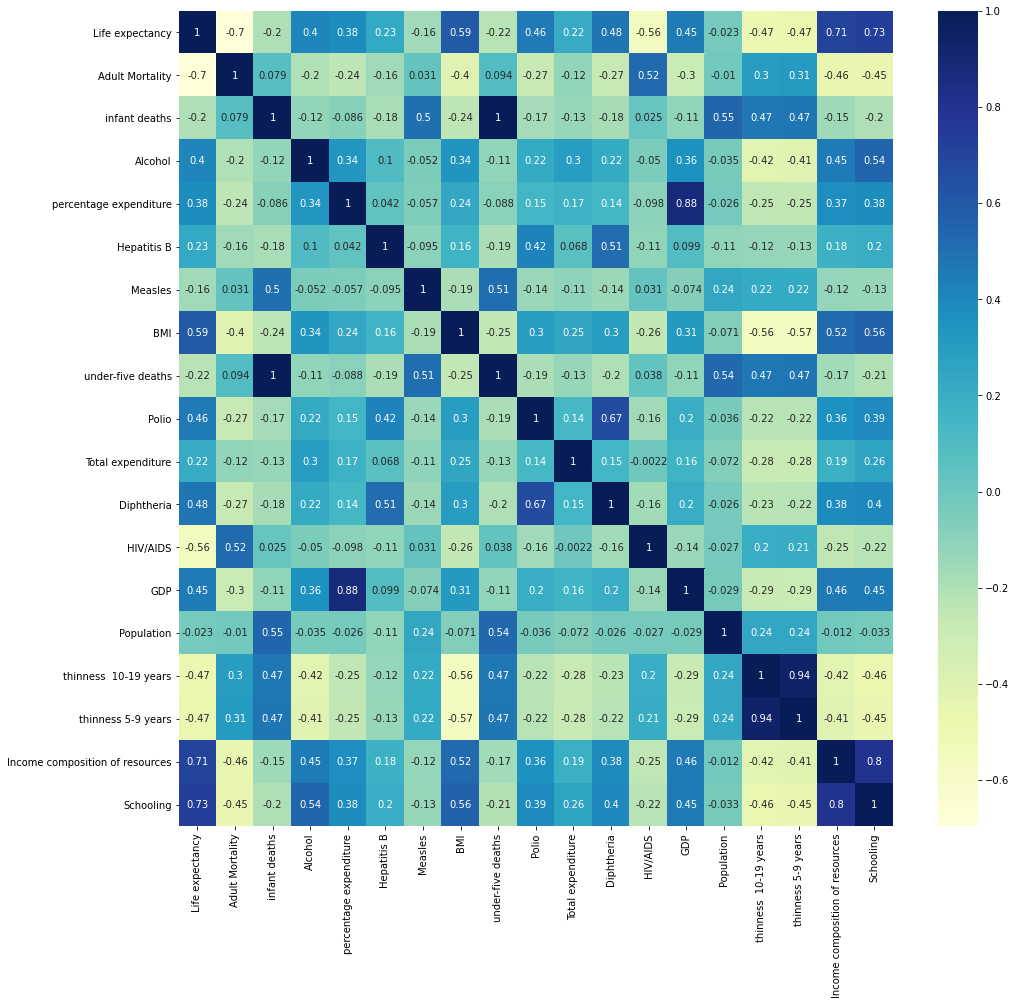

In [19]:
life_corr = life_df1.corr()

plt.figure(figsize=(16,15))
sns.heatmap(life_corr,annot=True,cmap="YlGnBu")
plt.show()

<ins>**Observation of correlation matrix:**</ins>
- Life expectancy has a strong correlation with variables 'Income composition of resources','Schooling' and good correlation between 'BMI','Polio','Diphtheria','GDP','Alcohol'
- Also there is a strong correlation between 'Income composition of resources' & 'Schooling' and between 'thinness 10-19 years' & 'thinness 5-9 years'.
- Life expectancy has least correlation with 'Adult mortality','infant deaths', 'Measles', ''HIV/AIDS' and with 'thinness 10-19 years' & 'thinness 5-9 years'
- This implies that diseases and thinness dont have a direct bearing on life expectancy since a person can be thin and stilll live a long life or that a person can recover from diseases through treatment.

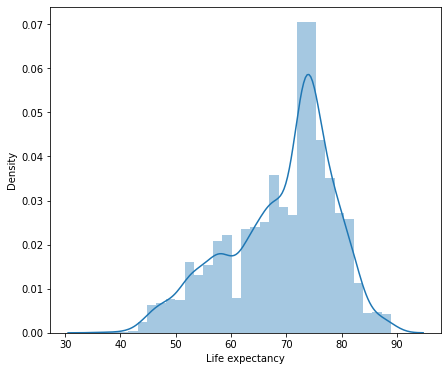

In [20]:
# Our target variable is the 'Life expectancy'

plt.figure(figsize=(7,6))
sns.distplot(life_df1['Life expectancy'])
plt.show()

#### <ins>From above target variable (Life expectancy) we understand that the majority of values purchased lie between 70 & 80 years</div></ins>


- Creating dummy variables for categorical variables

In [21]:
# selecting objects to convert to dummy variables
life_df1_categorical = life_df1.select_dtypes(include='object')
life_df1_categorical

,Country,Year,Status
0,Afghanistan,2015,Developing
1,Afghanistan,2014,Developing
2,Afghanistan,2013,Developing
3,Afghanistan,2012,Developing
4,Afghanistan,2011,Developing
...,...,...,...
2933,Zimbabwe,2004,Developing
2934,Zimbabwe,2003,Developing
2935,Zimbabwe,2002,Developing
2936,Zimbabwe,2001,Developing


In [22]:
life_df1_dummy = pd.get_dummies(life_df1_categorical,drop_first=True)
life_df1_dummy.head()

,Country_Albania,Country_Algeria,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,Country_Azerbaijan,Country_Bahamas,...,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Status_Developing
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [23]:
# Drop categorical variable columns 
life_df2 = life_df1.drop(list(life_df1_categorical.columns), axis=1)

# Concatenate the dummy to the main dataframe
life_df2 = pd.concat([life_df2, life_df1_dummy], axis=1)

In [24]:
life_df2.columns

Index(['Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles', 'BMI',
       'under-five deaths', 'Polio',
       ...
       'Year_2007', 'Year_2008', 'Year_2009', 'Year_2010', 'Year_2011',
       'Year_2012', 'Year_2013', 'Year_2014', 'Year_2015',
       'Status_Developing'],
      dtype='object', length=227)

### <ins><div class="alert alert-block alert-warning">*Step 5: Model building*</div></ins>

- Splitting the data into train test split

In [25]:
# Split the dataframe into train and test sets

from sklearn.model_selection import train_test_split
life_df2_train, life_df2_test = train_test_split(life_df2, train_size=0.7, test_size=0.3, random_state=100)

- Scaling the train dataset
    - Now that we have done the test-train split, we need to scale the variables for better interpretability. But we only need the scale the numeric columns and not the dummy variables

In [26]:
# creating list for numerical columns
num_values = life_df1.select_dtypes(exclude='object')
num_list = num_values.columns.values.tolist()
num_list

['Life expectancy',
 'Adult Mortality',
 'infant deaths',
 'Alcohol',
 'percentage expenditure',
 'Hepatitis B',
 'Measles',
 'BMI',
 'under-five deaths',
 'Polio',
 'Total expenditure',
 'Diphtheria',
 'HIV/AIDS',
 'GDP',
 'Population',
 'thinness  10-19 years',
 'thinness 5-9 years',
 'Income composition of resources',
 'Schooling']

In [27]:
# using standard scaler to scale the numerical variables

from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Scale these variables using 'fit_transform'
life_df2_train[num_list] = scaler.fit_transform(life_df2_train[num_list])
life_df2_train.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Status_Developing
405,-1.245384,0.918286,0.095461,-0.013981,-0.329630,0.430364,0.009559,-1.187295,0.184104,-3.182798,...,0,0,0,1,0,0,0,0,0,1
989,0.313334,-0.246478,-0.242544,-0.219326,-0.372704,-0.759406,0.391699,0.482561,-0.249248,-0.721039,...,0,0,0,0,0,0,0,0,0,1
2351,1.029502,-1.250584,-0.250592,1.499490,1.435603,0.299987,-0.211740,0.922555,-0.255184,0.574624,...,0,0,1,0,0,0,0,0,0,0
1856,1.040034,-0.688285,-0.250592,1.152178,-0.147718,0.298167,-0.208832,1.192912,-0.255184,0.185925,...,0,0,0,0,0,0,0,0,0,0
1479,-1.919425,2.910434,-0.218401,-0.480445,-0.296335,0.518495,0.007532,-0.492847,-0.219566,0.401869,...,0,0,0,1,0,0,0,0,0,1


The training dataset has been scaled

- Splitting train dataset into X_train & y_train

In [28]:
# Split the train dataset into X_train and y_train

X_train = life_df2_train.loc[:,life_df2_train.columns!='Life expectancy']
y_train = life_df2_train.loc[:,life_df2_train.columns=='Life expectancy']

- Fitting the model for all features

In [29]:
lm = LinearRegression()

# Fit a line
model = lm.fit(X_train, y_train)
model

LinearRegression()

In [30]:
# Print the coefficients and intercept

print(model.coef_)
print(model.intercept_)

[[-1.98613206e-02  8.93506218e-01 -2.52436187e-02  3.00443361e-02
  -1.22130599e-02 -1.29143019e-02 -1.51124864e-02 -8.80361611e-01
   6.68496486e-03 -1.15341488e-02  2.51836660e-02 -1.75489969e-01
  -2.91640878e-02  6.61058277e-04  3.65556220e-03  1.95893146e-02
  -3.02519667e-03  2.94610278e-02  1.85304024e+00  1.60069499e+00
  -6.50231033e-01  1.87114451e+00  1.81047822e+00  1.62838690e+00
  -4.08865468e+10 -4.08865468e+10  1.34368536e+00  1.78319770e+00
   1.82874435e+00  1.09443962e+00  1.76495337e+00  1.31922889e+00
  -4.08865468e+10  1.26003513e+00  4.92658615e-02  8.10371518e-01
   1.12582397e+00  1.95104279e+00  3.12417507e-01  1.55208755e+00
   1.90961909e+00 -4.08865468e+10 -3.43952179e-02 -7.72824287e-02
   1.54539037e+00  6.78018630e-01 -9.06083584e-02  2.49128163e+00
  -6.15016699e-01 -5.26283383e-01  2.29369840e+00  1.45674229e+00
   1.62915620e+00  3.97730231e-01  3.47440481e-01  8.46897483e-01
   2.17213941e+00 -4.08865468e+10  2.08575034e+00 -4.08865468e+10
  -4.08865

- Building model using RFE (Recursive feature elimination)

In [31]:
# Import RFE
from sklearn.feature_selection import RFE

# RFE with 200 features
lm = LinearRegression()
rfe1 = RFE(lm,226)

# Fit with 200 features
rfe1.fit(X_train, y_train)

# Print the boolean results
print(rfe1.support_)          
print(rfe1.ranking_)  

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

- Checking summary of the model using statsmodel

In [32]:
# Import statsmodels
import statsmodels.api as sm  

# Subset the features selected by rfe1
col1 = X_train.columns[rfe1.support_]

# Subsetting training data for 200 columns
X_train_rfe1 = X_train[col1]

# Add a constant to the model
X_train_rfe1 = sm.add_constant(X_train_rfe1)
X_train_rfe1.head()

,const,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Status_Developing
405,1.0,0.918286,0.095461,-0.013981,-0.329630,0.430364,0.009559,-1.187295,0.184104,-3.182798,...,0,0,0,1,0,0,0,0,0,1
989,1.0,-0.246478,-0.242544,-0.219326,-0.372704,-0.759406,0.391699,0.482561,-0.249248,-0.721039,...,0,0,0,0,0,0,0,0,0,1
2351,1.0,-1.250584,-0.250592,1.499490,1.435603,0.299987,-0.211740,0.922555,-0.255184,0.574624,...,0,0,1,0,0,0,0,0,0,0
1856,1.0,-0.688285,-0.250592,1.152178,-0.147718,0.298167,-0.208832,1.192912,-0.255184,0.185925,...,0,0,0,0,0,0,0,0,0,0
1479,1.0,2.910434,-0.218401,-0.480445,-0.296335,0.518495,0.007532,-0.492847,-0.219566,0.401869,...,0,0,0,1,0,0,0,0,0,1


In [33]:
# Fitting the model with 200 variables
model1 = sm.OLS(y_train, X_train_rfe1).fit()   
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     236.3
Date:                Sat, 27 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:26:20   Log-Likelihood:                 571.05
No. Observations:                2056   AIC:                            -694.1
Df Residuals:                    1832   BIC:                             566.7
Df Model:                         223                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

- The model seems to be doing a good job. Let's also quickly take a look at the VIF values.

In [34]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
226,Status_Developing,inf
25,Country_Australia,inf
157,Country_Romania,inf
58,Country_Croatia,inf
153,Country_Portugal,inf
...,...,...
67,Country_Dominica,1.16
164,Country_San Marino,1.15
0,const,0.00
128,Country_Monaco,NaN


Lets try and build a model with much lesser variables

In [35]:
# RFE with 200 features
lm = LinearRegression()
rfe2 = RFE(lm, 200)

# Fit with 200 features
rfe2.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=200)

In [36]:
# Subset the features selected by rfe2
col2 = X_train.columns[rfe2.support_]

# Subsetting training data for 200 selected columns
X_train_rfe2 = X_train[col2]

# Add a constant to the model
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fitting the model with 200 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     258.0
Date:                Sat, 27 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:26:38   Log-Likelihood:                 537.91
No. Observations:                2056   AIC:                            -673.8
Df Residuals:                    1855   BIC:                             457.5
Df Model:                         200                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

The R-squared and Adj. R-squared hasnt dropped much. 200 seems to be good number to start

In [37]:
# Check for the VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,infant deaths,1540.18
2,under-five deaths,1329.89
0,const,174.90
200,Status_Developing,28.01
76,Country_India,25.65
...,...,...
51,Country_Dominica,1.02
174,Country_Tuvalu,1.02
125,Country_Palau,1.02
121,Country_Niue,1.02


Let's drop the column with high VIF 'infant deaths'

In [38]:
X_train_rfe2.drop('infant deaths', axis = 1, inplace = True)

In [39]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fitting the model with 199 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     254.9
Date:                Sat, 27 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:26:51   Log-Likelihood:                 520.04
No. Observations:                2056   AIC:                            -640.1
Df Residuals:                    1856   BIC:                             485.6
Df Model:                         199                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [40]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,174.39
199,Status_Developing,27.54
1,under-five deaths,20.18
75,Country_India,14.43
2,HIV/AIDS,3.80
...,...,...
50,Country_Dominica,1.02
173,Country_Tuvalu,1.02
124,Country_Palau,1.02
39,Country_Cook Islands,1.02


Let's drop 'under-five deaths' & check

In [41]:
X_train_rfe2.drop('under-five deaths', axis = 1, inplace = True)

In [42]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fitting the model with 198 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     255.2
Date:                Sat, 27 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:27:03   Log-Likelihood:                 515.72
No. Observations:                2056   AIC:                            -633.4
Df Residuals:                    1857   BIC:                             486.6
Df Model:                         198                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [43]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,174.39
198,Status_Developing,27.47
1,HIV/AIDS,3.80
185,Year_2003,2.07
114,Country_Netherlands,2.07
...,...,...
103,Country_Marshall Islands,1.02
141,Country_San Marino,1.02
172,Country_Tuvalu,1.02
49,Country_Dominica,1.02


Let's drop 'Status_Developing' as it still has a high vif

In [44]:
X_train_rfe2.drop('Status_Developing', axis = 1, inplace = True)

In [45]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fitting the model with 198 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     144.7
Date:                Sat, 27 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:27:16   Log-Likelihood:                -45.367
No. Observations:                2056   AIC:                             486.7
Df Residuals:                    1858   BIC:                             1601.
Df Model:                         197                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [46]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,39.52
1,HIV/AIDS,3.66
195,Year_2013,2.07
185,Year_2003,2.07
196,Year_2014,2.05
...,...,...
119,Country_Niue,1.02
38,Country_Cook Islands,1.02
141,Country_San Marino,1.02
172,Country_Tuvalu,1.02


We still have features whose p-values are high means they are insignificant. So dropping those features

In [47]:
X_train_rfe2.drop('Country_Comoros', axis = 1, inplace = True)

In [48]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fitting the model with 198 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     145.3
Date:                Sat, 27 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:27:28   Log-Likelihood:                -46.668
No. Observations:                2056   AIC:                             487.3
Df Residuals:                    1859   BIC:                             1596.
Df Model:                         196                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [49]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,36.86
1,HIV/AIDS,3.58
194,Year_2013,2.07
184,Year_2003,2.07
195,Year_2014,2.05
...,...,...
102,Country_Marshall Islands,1.02
171,Country_Tuvalu,1.02
37,Country_Cook Islands,1.02
48,Country_Dominica,1.02


Let's drop all features with high p values which are 'Country_Congo','Country_Eritrea','Country_Ethiopia','Country_Gambia','Country_Kenya','Country_Papua New Guinea','Country_Rwanda','Country_Sudan','Country_United Republic of Tanzania','Year_2001'

In [50]:
X_train_rfe2.drop(['Country_Congo','Country_Eritrea',
                   'Country_Ethiopia','Country_Gambia',
                   'Country_Kenya','Country_Papua New Guinea',
                   'Country_Rwanda','Country_Sudan',
                   'Country_United Republic of Tanzania','Year_2001'], axis = 1, inplace = True)

In [51]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fitting the model with 198 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     152.5
Date:                Sat, 27 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:27:40   Log-Likelihood:                -55.645
No. Observations:                2056   AIC:                             485.3
Df Residuals:                    1869   BIC:                             1538.
Df Model:                         186                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

We missed dropping 'Country_Lesotho'

In [52]:
X_train_rfe2.drop('Country_Lesotho', axis = 1, inplace = True)

In [53]:
X_train_rfe2 = sm.add_constant(X_train_rfe2)

# Fitting the model with 198 variables
lm2 = sm.OLS(y_train, X_train_rfe2).fit()   
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     153.1
Date:                Sat, 27 Feb 2021   Prob (F-statistic):               0.00
Time:                        20:27:40   Log-Likelihood:                -57.471
No. Observations:                2056   AIC:                             486.9
Df Residuals:                    1870   BIC:                             1534.
Df Model:                         185                                         
Covariance Type:            nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------

In [54]:
# Checking VIF

vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,18.39
1,HIV/AIDS,2.65
183,Year_2013,1.54
149,Country_Swaziland,1.52
181,Year_2011,1.49
...,...,...
96,Country_Marshall Islands,1.01
36,Country_Cook Islands,1.01
162,Country_Tuvalu,1.01
132,Country_San Marino,1.01


**We have 186 features that are giving R-squared = 0.938 & Adj. R-squared = 0.932. Hence our model is working fine**

### <ins><div class="alert alert-block alert-warning">*Step 6: Fitting model and making predictions*</div></ins>

- Scaling the test data as well

In [55]:
life_df2_test[num_list] = scaler.transform(life_df2_test[num_list])

In [56]:
# Split the 'life_df2_test' set into X and y
life_df2_test.to_csv('abc.csv', index=False)
X_test = life_df2_test.loc[:,life_df2_test.columns!='Life expectancy']
y_test = life_df2_test.loc[:,life_df2_test.columns=='Life expectancy']

In [57]:
# selecting only those features obtained by elimination by rfe

X_train_rfe2 = X_train_rfe2.drop('const',axis=1)
feat_list = X_train_rfe2.columns.values.tolist()
X_test_rfe2 = X_test[feat_list]

In [58]:
# Add a constant to the test set created

X_test_rfe2 = sm.add_constant(X_test_rfe2)
X_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 882 entries, 1698 to 775
Columns: 186 entries, const to Year_2015
dtypes: float64(2), uint8(184)
memory usage: 179.2 KB


In [59]:
# Making predictions

y_pred = lm2.predict(X_test_rfe2)

Text(0, 0.5, 'y_pred')

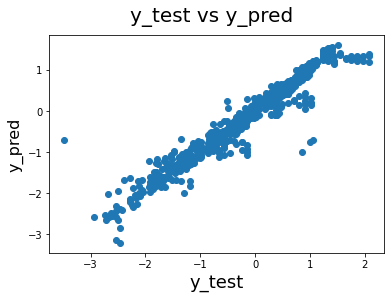

In [60]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)               
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16) 

**From above scatter diagram it is evident that the model is doing very good on test set as well. Very few points deviating from actual predictions. Lets check the R2 score as well**

In [70]:
# r2_score for 186 variables

from sklearn.metrics import r2_score
r_squared = (round(r2_score(y_test, y_pred),2))*100
r_squared

94.0

In [78]:
# calculating adj-squared for 186 variables

adj_r_squared = round(1-(1-(r2_score(y_test, y_pred)))*(2938-1)/(2938-186-1),2)*100 # n=2938 , k=186
adj_r_squared

93.0

In [88]:
# calculating rmse value 

from sklearn import metrics 
print(round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

0.25


Thus for the model with 186 variables the R-squared on train and test data is 93.8% and 94%

### <ins><div class="alert alert-block alert-warning">*Observations for the model*</div></ins>

- **186 features selected have been able to give good predictions with 'r score' of 93.8% & 94% each.**
- **Hence we can consider these features selected to satisfactorily predict life expectancy.**